# Exercises

In [25]:
import xarray as xr
import numpy as np

You are given the output of a climate model in the form of a csv file. The the data is supposed to contain 3 days of daily precipitation data for a 10*10 pixel area over Bern. First we read the data:

In [26]:
# This is an example of how you can read a csv file
import csv
input_list = []
with open("C:/Users/maregger/Nextcloud/Uni/PhD/Teaching/Climate Risk Assessment/CRA_2025/CRA25_Tutors/Tutorial2_Numpy_and_Xarray/ex2_data.csv", newline="") as file:
    reader = csv.reader(file, delimiter = ',')
    for row in reader:
        input_list.append(row)
        
input_list = [element[0] for element in input_list] # The csv reader gives us a list of strings which we convert to floats here

Now we have the model data in the form of a one-dimensional list which is rather inconvenient. It would be easier to interpret if we had it in the form of a 3d-array. Can you create an appropriate array from the list? (Hint: the data is ordered with the values of each row appended and then the values of each day appended)

In [27]:
# your code here
precipitation_array = np.array(input_list).reshape(3,10,10)

Now that we have a nice 3d-array lets look at the data. First let's check what datatype the values have:

In [28]:
# your code here
precipitation_array.dtype

dtype('<U24')

If we want to do any calculations this datatype will not work. Can you convert it into a more useful one? (Hint: we'd like to have a "float64" datatype)

In [29]:
# your code here
precipitation_array =  precipitation_array.astype("float64")

Ok, now that we have numeric values let's see what the maximum measured precipitation was:

In [30]:
# your code here
precipitation_array.max()

np.float64(0.0017088548047468066)

Now this value looks a bit weird for precipitation. The unit is actually $kg*m^{-2}*s^{-1}$ averaged for the whole day. Let's convert the data into a more easily interpretable unit. Can you calculate the number $mm*m^{-2}$ which fell for each pixel?

In [31]:
# your code here
precip_array_mm = precipitation_array * 24 * 60 * 60
precip_array_mm

array([[[ 19.03156922,  26.19992327,  29.31210464,  28.28487223,
          24.59992692,  21.10612923,  18.90024575,  17.11298176,
          15.40054386,  12.34383015],
        [ 10.04157385,  12.64926754,  15.80231069,  18.4141553 ,
          18.93417737,  18.78673802,  17.81972959,  15.37673213,
          12.96955724,  10.50849322],
        [ 15.93836155,  15.72226183,  16.71189386,  17.63431267,
          18.25431157,  19.4188999 ,  20.49089167,  19.21113851,
          18.66148347,  19.87969503],
        [ 21.33249342,  22.67012196,  23.51913666,  24.24934041,
          24.9188072 ,  26.68036222,  28.86225544,  32.29014119,
          34.22493758,  35.14280878],
        [ 23.85399453,  25.8749024 ,  27.08040029,  28.29494057,
          29.64342451,  31.9198329 ,  34.23546357,  36.44540682,
          35.78768307,  34.57039185],
        [ 25.76387655,  24.20642171,  24.05196168,  24.79752693,
          25.79994807,  26.42732598,  27.46123709,  27.74036201,
          25.47073541,  23.998

Now let's find the maximum value again. Can you figure out on which day the highest precipitation sum was measured? (Hint: look at the "where" function in numpy.)

In [32]:
precip_array_mm.max()

np.float64(147.6450551301241)

In [33]:
# your code here
np.where(precip_array_mm==precip_array_mm.max()) #we have to give a condition to where function the == compares the two values and returns True/False

#The Answer is the 2nd timestep (index 1 of the first dimension)

(array([1]), array([0]), array([1]))

While the daily maxima are interesting, we are actually even more interested in the 3 day precipitation mean for that pixel. Can you calculate it?

In [34]:
# your code here
np.mean(precip_array_mm, axis = 0)[0,1]

np.float64(60.11766493320465)

Now finally, can you figure out the total precipitation (in $m^3$) which fell in this pixel and all it's adjacent pixels over the 3 days? Let's assume that each pixel has an area of 1 $km^2$.

(Hint: Since the pixel is at the edge (as we can see in the previous exercise) of our $10*10$ grid we should select a $2*3$ area for all 3 days.)

In [35]:
precip_array_mm[:,0:2,0:3].sum()*1000

np.float64(761835.7695057057)

Now playing around with this small model output was fun but we'd like to look at a bit more data. Let's use the full model we have introduced above:"TREFHT_EU_10-members_19701999_20702099.nc"

In [36]:
# your code here
ds = xr.open_dataset('C:/Users/maregger/Nextcloud/Uni/PhD/Teaching/Climate Risk Assessment/CRA_2025/CRA25_Tutors/Tutorial2_Numpy_and_Xarray/pr_EUR-11_ICHEC-EC-EARTH_rcp85_r12i1p1_CLMcom-CCLM4-8-17_v1_day_20210101-20211231_LL.nc')

Can you figure out what the dataset contains? Which timeframe do we have? When was it created? What's the title of the dataset?

In [37]:
# your code here
ds
# timeframe: 365 timesteps. Daily data 
# When was it created:     2014-03-26 06:23:41
# Title: CLMcom-CCLM4-8-17 model output prepared for CORDEX RCP8.5

<xarray.Dataset> Size: 281MB
Dimensions:    (time: 365, bnds: 2, lon: 471, lat: 409)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2021-01-01T12:00:00 ... 2021-12-31T1...
  * lon        (lon) float64 4kB -10.0 -9.9 -9.8 -9.7 ... 36.7 36.8 36.9 37.0
  * lat        (lat) float64 3kB 30.0 30.1 30.2 30.3 ... 70.5 70.6 70.7 70.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 6kB ...
    pr         (time, lat, lon) float32 281MB ...
Attributes: (12/31)
    CDI:                            Climate Data Interface version ?? (http:/...
    history:                        Thu Mar 12 16:57:48 2020: cdo selyear,202...
    source:                         CLMcom-CCLM4-8-17
    institution:                    Climate Limited-area Modelling Community ...
    Conventions:                    CF-1.4
    institute_id:                   CLMcom
    ...                             ...
    project_id:                     CORDEX
    table_id:                       Table day (Sept 2013) 0cf1782745489246c9f...
    modeling_realm:                 atmos
    realization:                    12
    cmor_version:                   2.9.1
    CDO:                            Climate Data Operators version 1.9.3 (htt...

Again the units are in $kg*m^{-2}*s^{-1}$. Can you convert the dataset to total daily $mm*m^{-2}$ and also adapt its metadata?

In [38]:
# your code here
ds.pr.values = ds.pr.values*24*60**2
ds.pr.attrs['units'] = 'daily mm m-2'
# Be careful, if you run this cell multiple times it will multipy the values each time!

Now can you find on what day the Bern had the maximum precipitation accumulation? (Bern is located at 46.9480° N, 7.4474° E) (Hint:You may need to google for the correct function.)

In [39]:
# your code here
bern_pixel = ds.pr.sel(lat=46.9480, lon=7.4474, method='nearest')
bern_pixel.idxmax()

<xarray.DataArray 'time' ()> Size: 8B
array('2021-08-04T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    lon      float64 8B 7.4
    lat      float64 8B 46.9

Now let's see how the precipitation looked over switzerland on that day. Can you plot it?

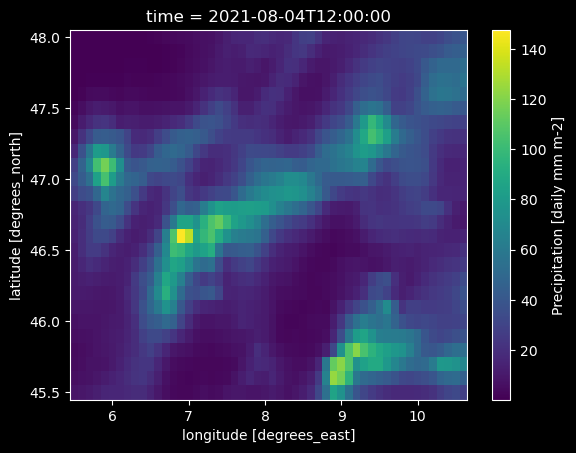

In [40]:
# your code here
ds.pr.sel(time = '2021-08-04 12:00:00', lat = slice(45.5, 48), lon = slice(5.5,10.7)).plot()

Can you also add the previous and the following day to your plot? Can you arrange them vertically, each plot above another?

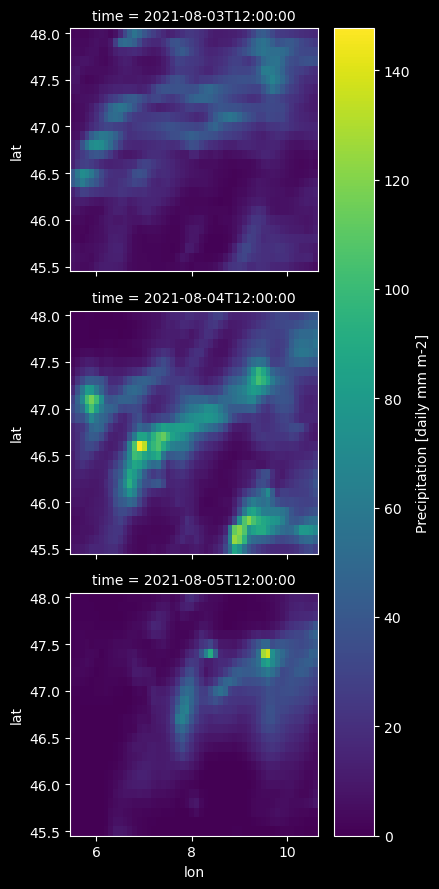

In [41]:
ds.pr.sel(time = slice('2021-08-03 12:00:00', '2021-08-05 12:00:00'), lat = slice(45.5, 48), lon = slice(5.5,10.7)).plot(col='time',col_wrap=1)

To finish up: can you properly close the dataset and delete all the xarray objects?

In [42]:
# your code here
ds.close()
del ds, bern_pixel